# Intel Image Classification using VGG16 Convolutional Base in Deep Learning

The image datasets have been taken from kaggle. Those are image of Natural Scenes around the world. 

This Data contains around 25k images of size 150x150 distributed under 6 categories:'buildings', 'forest','glacier', 'mountain', 'sea', 'street'.


CNN network has been used for this classification problem. Here VGG16 is used as convolutional base. The pretrained weights and biases have been used which was provided by imagenet. Then the fully connected layers have been trained by ourselves.

In [1]:
# downloading intel image classification datasets from kaggle

!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Unzipping the datasets

import zipfile
zip_ref=zipfile.ZipFile("intel-image-classification.zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
# importing required library

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Data augmentation and normalization to reduce overfitting and speed up the training respectively

batch=32

train_dgen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2
)

test_dgen=ImageDataGenerator(rescale=1./255)

train_ds=train_dgen.flow_from_directory(
    "seg_train/seg_train",
    target_size=(150,150),
    batch_size=batch,
    class_mode="categorical"
)

validation_ds=test_dgen.flow_from_directory(
    "seg_test/seg_test",
    target_size=(150,150),
    batch_size=batch,
    class_mode="categorical"
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


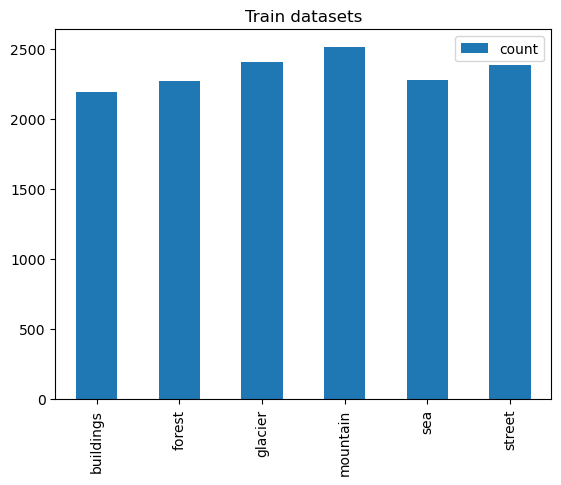

In [5]:
# checking data imbalance in training datasets

dict = {}
dict['columns'] = list(train_ds.class_indices.keys())
dict['count'] = pd.Series(train_ds.labels).value_counts().sort_index()

pd.DataFrame(dict).plot(kind = 'bar')
plt.title("Train datasets")
plt.xticks([0,1,2,3,4,5],labels= dict['columns'])
plt.show()

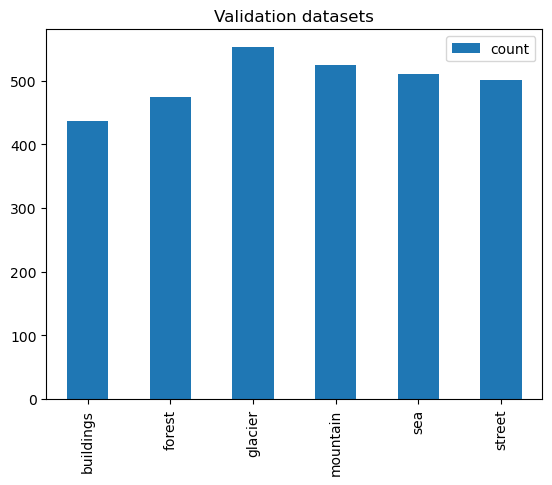

In [6]:
# checking data imbalance in validation datasets
dict = {}
dict['columns'] = list(validation_ds.class_indices.keys())
dict['count'] = pd.Series(validation_ds.labels).value_counts().sort_index()

pd.DataFrame(dict).plot(kind = 'bar')
plt.title("Validation datasets")
plt.xticks([0,1,2,3,4,5],labels= dict['columns'])
plt.show()

In [7]:
# Using VGG16 as convolutional base

vgg_conv_base=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)

In [8]:
vgg_conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Here batch normalization has been used to train the model faster and efficiently and dropout has been used to save the model from overfitting.

In [9]:
# Adding the FCL layer to the convolutional base

model=Sequential()

model.add(vgg_conv_base)

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(6,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,789,830 (60.23 MB)

 Trainable params: 15,789,190 (60.23 MB)

 Non-trainable params: 640 (2.50 KB)

In [11]:
# Using pretrained weights and bias of the convolutional base

vgg_conv_base.trainable=False

In [12]:
# final model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,789,830 (60.23 MB)

 Trainable params: 1,074,502 (4.10 MB)

 Non-trainable params: 14,715,328 (56.13 MB)

In [13]:
# compiling the model

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
# Using earlystopping to save from overfitting

callback=keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
)

In [22]:
# Training the model

history=model.fit(train_ds,epochs=40,validation_data=validation_ds,callbacks=callback)

Epoch 1/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 349s 786ms/step - accuracy: 0.7595 - loss: 0.6966 - val_accuracy: 0.8510 - val_loss: 0.4151
Epoch 2/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 213s 480ms/step - accuracy: 0.8253 - loss: 0.5131 - val_accuracy: 0.8530 - val_loss: 0.3956
Epoch 3/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 213s 481ms/step - accuracy: 0.8440 - loss: 0.4470 - val_accuracy: 0.8750 - val_loss: 0.3550
Epoch 4/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 211s 478ms/step - accuracy: 0.8531 - loss: 0.4197 - val_accuracy: 0.8620 - val_loss: 0.3657
Epoch 5/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 213s 480ms/step - accuracy: 0.8625 - loss: 0.4070 - val_accuracy: 0.8690 - val_loss: 0.3610
Epoch 6/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 212s 480ms/step - accuracy: 0.8608 - loss: 0.3946 - val_accuracy: 0.8683 - val_loss: 0.3629
Epoch 7/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 213s 482ms/step - accuracy: 0.8597 - loss: 0.3928 - val_accuracy: 0.8737 - val_loss: 0.3522
Epoch 8/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 211s 477ms/step - accuracy: 0.8763 -

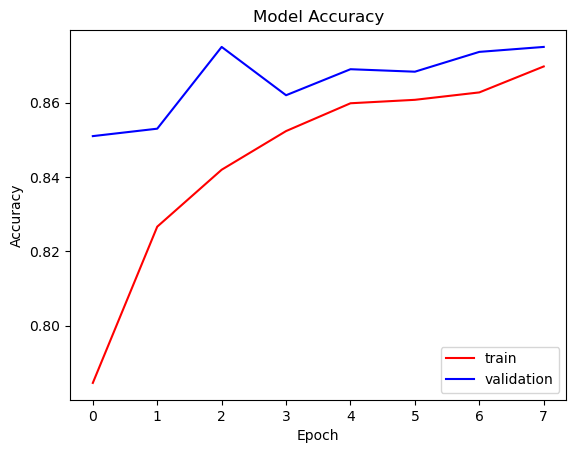

In [24]:
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

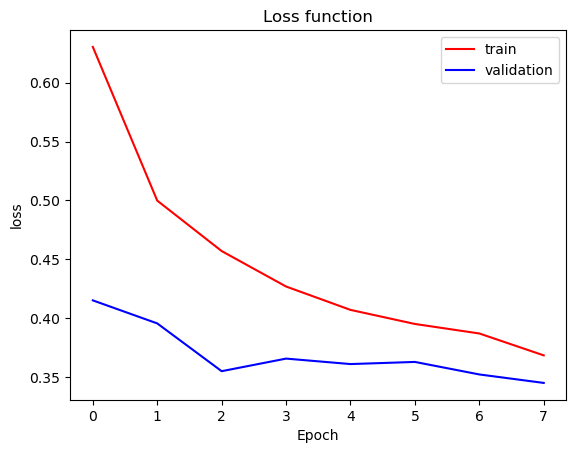

In [26]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.title('Loss function')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

CONCLUSIONS:

After 8th epoch the training was stopped as it was approaching to overfitting. Here we got a good validation accuracy. If we use for FCL, we might get more accuracy.